In [2]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import codecs
%matplotlib inline

Dataset from kaggle:

https://www.kaggle.com/datasets/venky73/spam-mails-dataset?select=spam_ham_dataset.csv

## Loading the dataset

In [4]:
import kagglehub

path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 2.53MB/s]

Extracting files...
Path to dataset files: /home/alesv/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [5]:
df = pd.read_csv("./data/spam_ham_dataset.csv", index_col=0, sep=',')

In [6]:
df

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
1409,ham,Subject: industrial worksheets for august 2000...,0


In [7]:
df.shape

(5171, 3)

In [8]:
df["label_num"].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [9]:
df['text'][12]

'Subject: 2 nd rev dec . 1999 josey ranch nom\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by susan d trevino / hou / ect on 12 / 15 / 99 08 : 41\r\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nbob withers on 12 / 15 / 99 08 : 28 : 08 am\r\nto : susan d trevino / hou / ect @ ect\r\ncc : stretch brennan , kevin mclarney ,\r\n" \' taylor vance ( e - mail ) \' "\r\nsubject : 2 nd rev dec . 1999 josey ranch nom\r\nhere \' s revised december 1999 ( effective 12 / 15 / 99 ) setup for\r\njosey : ( using 1 . 081 btu / mcf )\r\n* gas deliveries into hpl\r\n9 , 300 mmbtu / d for kri ( net reduction of\r\n3 , 000 mmbtu / d )\r\n9 , 300 mmbtu / d into hpl\r\nbob withers > <\r\nkcs energy , 5555 san felipe , suite 1200\r\nhouston , tx 77056\r\nvoice mail / page 713 - 964 - 9434'

In [10]:
def remove_line_break(text):
    # Removes all line breaks
    for sign in '\r\n':
        text = text.replace(sign, " ")
    return text

In [11]:
df["text"] = df["text"].apply(remove_line_break)

In [12]:
df['text'][12]

'Subject: 2 nd rev dec . 1999 josey ranch nom  - - - - - - - - - - - - - - - - - - - - - - forwarded by susan d trevino / hou / ect on 12 / 15 / 99 08 : 41  am - - - - - - - - - - - - - - - - - - - - - - - - - - -  bob withers on 12 / 15 / 99 08 : 28 : 08 am  to : susan d trevino / hou / ect @ ect  cc : stretch brennan , kevin mclarney ,  " \' taylor vance ( e - mail ) \' "  subject : 2 nd rev dec . 1999 josey ranch nom  here \' s revised december 1999 ( effective 12 / 15 / 99 ) setup for  josey : ( using 1 . 081 btu / mcf )  * gas deliveries into hpl  9 , 300 mmbtu / d for kri ( net reduction of  3 , 000 mmbtu / d )  9 , 300 mmbtu / d into hpl  bob withers > <  kcs energy , 5555 san felipe , suite 1200  houston , tx 77056  voice mail / page 713 - 964 - 9434'

In [13]:
df['lenght'] = df['text'].apply(lambda x: len(x))

<Axes: >

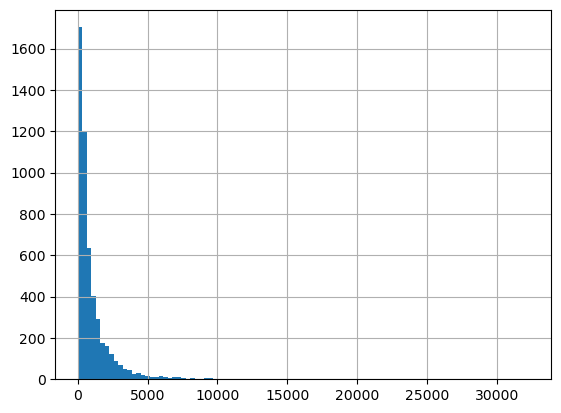

In [14]:
df['lenght'].hist(bins=100)

## Using TF

### Unigrams

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = None, 
                             max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])
data_text

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 412073 stored elements and shape (5171, 15000)>

In [16]:
data_text.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5171, 15000))

In [18]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zwiers', 'zxgwvpimicrosoft', 'zyban'],
      shape=(15000,), dtype=object)

In [19]:
vectorizer.get_feature_names_out()[1000:1010]

array(['54', '540', '541', '542', '5427', '544', '545', '547', '547201',
       '548'], dtype=object)

In [20]:
vectorizer.get_feature_names_out()[10000:10010]

array(['moval', 'move', 'moved', 'movement', 'moves', 'movie', 'movies',
       'moving', 'mozilla', 'mp'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf=mnb.fit(X_train,y_train)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, mnb.predict(X_test))

0.9659706109822119

### Unigrams without stop words

In [26]:
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,
                             stop_words="english",max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9690641918020109

###Bigrams without stop words

In [28]:
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,
                             stop_words="english", ngram_range=(2,2))
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9574632637277649

### N-grams (1)

In [ ]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,
                             preprocessor = None,stop_words = None,max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

### N-grams (2)

In [30]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,
                             stop_words = None, ngram_range=(2,2), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [ ]:
vectorizer.get_feature_names_out()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.814385150812065

### N-grams (3)

In [32]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(3,3), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.shape

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9303944315545244

### N-grams (4)

In [34]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(4,4), max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9466357308584686

### N-grams (5)

In [36]:
vectorizer = CountVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(5,5), max_features = 30000)
data_text = vectorizer.fit_transform(df["text"])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9651972157772621

## Using TF-IDF

###Unigrams

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,stop_words = None,max_features = 15000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
vectorizer.get_feature_names_out()

In [41]:
data_text.toarray()

array([[0.10392772, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(5171, 15000))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9566898685228151

### N-grams (5)

In [42]:
vectorizer = TfidfVectorizer(analyzer = "char_wb",tokenizer = None,preprocessor = None,stop_words = None,
                             ngram_range=(5,5), max_features = 30000)
data_text = vectorizer.fit_transform(df["text"])

In [ ]:
data_text.toarray()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_text, df["label_num"], test_size=0.25)
clf=mnb.fit(X_train,y_train)
accuracy_score(y_test, mnb.predict(X_test))

0.9574632637277649